# pymcfost tutorial


This notebook illustrate some of the main capabilities of pymcfost to run and explore mcfost models. We assume here that you are already familiar with the use of mcfost

We first perform basic imports.
The python package is named pymcfost to avoid confusion with mcfost itself, but we import it as mcfost for convenience.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pymcfost as mcfost

/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/SED.py:10: UserWarning: mpl_scatter_density is not present
  warnings.warn("mpl_scatter_density is not present", UserWarning)
/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/line.py:16: UserWarning: progressbar is not present
  warnings.warn("progressbar is not present", UserWarning)


In [26]:
infolder = '/Users/desgranc/Documents/work/GitHub_clone/projects/HD102326/create_disk_model_mcfost/config_files/'
configfile = 'job0_tuto_4.0.para'

## Running a mcfost model


``mcfost.run`` performs a system call and run the mcfost binary, assuming it is available in your system path.

We make sure to delete any potential previous model.
Note that when running pymcfost from a notebook, the mcfost output is displayed in the terminal, not in the notebook.

In [27]:
mcfost.run(infolder+configfile, delete_previous=True)

pymcfost: Running mcfost ...
 You are running MCFOST 4.0.00
 Git SHA = 6f796ba3cc8976d2e1265e0148f533d5a3895286
 it can be turned back on with -rt2
 Input file read successfully
 Thermal equilibrium calculation
 Temperature calculation under LTE approximation
 Parallelized code on  10 processors
  
Jeu 25 mai 2023 19:26:56 CEST
 Creating directory ././data_th
 Using ray-tracing method 1
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Number of regions detected: 1
 zone 1 --> region= 1 : R=1.00 to 300.00 AU
 Using        7000 cells
 Total  gas mass in model:  0.1000000      Msun
 Total dust mass in model:  1.0000000E-03  Msun
 Using scattering method 2
 Trying to find appropriate stellar spectra ...
 Star #           1  --> lte5000-4.0.NextGen.fits.gz
 Done
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Stellar_Spectra
 /lte5000-4.0.NextGen.fits.gz
 Computing dust properties ... Done
 lambda =  0.871355626679430     
 Integ ta

### Reading the model and plotting the temperature map and SED


We first read the model:


In [28]:
model = mcfost.SED("./data_th/")

We can acces the parameter file values via model.P and display them:

In [29]:
print(model.P)

4.0                       mcfost version

#-- Number of photon packages --
  1.28e+05                nbr_photons_eq_th  : T computation
  1280                    nbr_photons_lambda : SED computation
  1.28e+06                nbr_photons_image : images computation

#-- Wavelength --
  50   0.100   3000.000      n_lambda, lambda_min, lambda_max [microns]
  True True True         compute temperature?, compute sed?, use default wavelength grid ?
  IMLup.lambda            wavelength file (if previous parameter is F)
  True True              separation of different contributions?, stokes parameters?

#-- Grid geometry and size --
  1                       1 = cylindrical, 2 = spherical
  100 70 1 20             n_rad (log distribution), nz (or n_theta), n_az, n_rad_in

#-- Maps --
  301 301 700.0           grid (nx,ny), size [au]
  0.0   45.0   3 False    RT: imin, imax, n_incl, centered ?
  0.0   0.0    1          RT: az_min, az_max, n_az
  140.00                  distance (pc)
  -90.00    

 and plot the temperature structure:


In [ ]:
model.plot_T()

Trying to read grid structure ...
No grid structure, trying to create it ...
pymcfost: Running mcfost ...
 You are running MCFOST 4.0.00
 Git SHA = 6f796ba3cc8976d2e1265e0148f533d5a3895286
 it can be turned back on with -rt2
 Input file read successfully
 Computation of disk structure
 Creating directory ././data_disk
 Parallelized code on  10 processors
  
Jeu 25 mai 2023 19:27:57 CEST
 Using ray-tracing method 1
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Number of regions detected: 1
 zone 1 --> region= 1 : R=1.00 to 300.00 AU
 Using        7000 cells
 Total  gas mass in model:  0.1000000      Msun
 Total dust mass in model:  1.0000000E-03  Msun
 Using scattering method 2
 Writing disk structure files in data_disk ...


a "log" view makes it easier to see the temperature structure:

/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/SED.py:183: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(r, z / r, T, norm=mcolors.LogNorm(vmin=Tmin, vmax=Tmax))


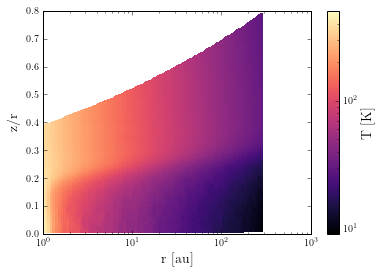

In [12]:
model.plot_T(log=True)

We can also plot the SED for the 1st inclination:

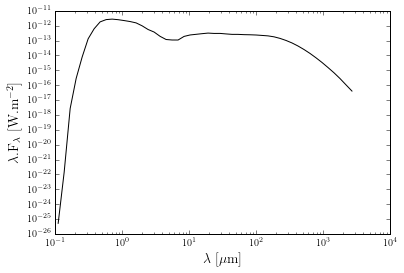

In [13]:
model.plot(0)

The SED above is a bit noisy in the mid-infrared, we can increase the number of packets by a factor 10, and re-run the model. We also use a blackbody for the star instead of a proper spectrum.

In [14]:
import copy
P = copy.copy(model.P)
P.phot.nphot_SED *= 10     # 10 times more packets for the SED
P.stars[0].is_bb = False   # we do not want the star to be a black-body
P.writeto("tmp.para")
mcfost.run("tmp.para", delete_previous=True)  # We need to recompute everything because we changed the star

pymcfost: Running mcfost ...
 You are running MCFOST 4.0.00
 Git SHA = 6f796ba3cc8976d2e1265e0148f533d5a3895286
 it can be turned back on with -rt2
 Input file read successfully
 Thermal equilibrium calculation
 Temperature calculation under LTE approximation
 Parallelized code on  10 processors
  
Jeu 25 mai 2023 19:10:24 CEST
 Creating directory ././data_th
 Using ray-tracing method 1
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Number of regions detected: 1
 zone 1 --> region= 1 : R=1.00 to 300.00 AU
 Using        7000 cells
 Total  gas mass in model:  0.1000000      Msun
 Total dust mass in model:  1.0000000E-03  Msun
 Using scattering method 2
 Trying to find appropriate stellar spectra ...
 Star #           1  --> lte4000-3.5.NextGen.fits.gz (forced)
 Done
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Stellar_Spectra
 /lte4000-3.5.NextGen.fits.gz
 Computing dust properties ... Done
 lambda =  0.871355626679430     


Let's read the new model and plot it again.

We can also plot the various contribution:
 - pink : direct stellar light
 - blue : scattered stellar light
 - red : direct thermal emission
 - green : scattered thermal emission

(1e-16, 2e-12)

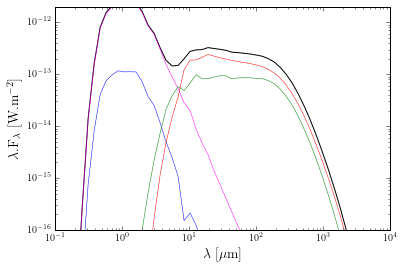

In [15]:
model = mcfost.SED("./data_th/")
model.plot(0, contrib=True)
plt.ylim(1e-16,2e-12)   # we reduce the range on the y axis

## Scattered light images and polarisation maps

We can compute scattered-light images at 1micron and plot the corresponding maps.

pymcfost: Running mcfost ...
 You are running MCFOST 4.0.00
 Git SHA = 6f796ba3cc8976d2e1265e0148f533d5a3895286
 Input file read successfully
 Scattered light + thermal emission map calculation
 Calculating image at wavelength =   1.000000      micron
 Parallelized code on  10 processors
  
Jeu 25 mai 2023 19:13:25 CEST
 Creating directory ././data_1.0
 Using ray-tracing method 2
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Number of regions detected: 1
 zone 1 --> region= 1 : R=1.00 to 300.00 AU
 Using        7000 cells
 Total  gas mass in model:  0.1000000      Msun
 Total dust mass in model:  1.0000000E-03  Msun
 Using scattering method 2
 Trying to find appropriate stellar spectra ...
 Star #           1  --> lte5000-4.0.NextGen.fits.gz
 Done
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Stellar_Spectra
 /lte5000-4.0.NextGen.fits.gz
 Integ tau dans plan eq. =    1852.082    
  Column density (g/cm^2)   =    4.493638  

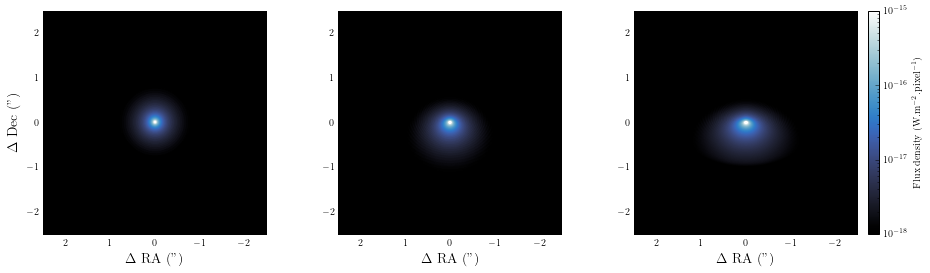

In [17]:
mcfost.run(infolder+configfile,options = "-img 1.0")

image_1mum = mcfost.Image("./data_1.0/")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
cbar = False
no_ylabel = False
for i in range(3):
    if i==2:
        cbar=True
    if i>0:
        no_ylabel=True
    image_1mum.plot(i, ax=axes[i], vmax=1e-15, colorbar=cbar, no_ylabel=no_ylabel)

We can also plot the corresponding polarisation maps, for instance the Qphi map with overlayed polarisation vectors:

/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/image.py:455: RuntimeWarning: invalid value encountered in true_divide
  pola = 100 * np.sqrt((Qb / np.maximum(Ib,1e-300)) ** 2 + (Ub / np.maximum(Ib,1e-300)) ** 2)


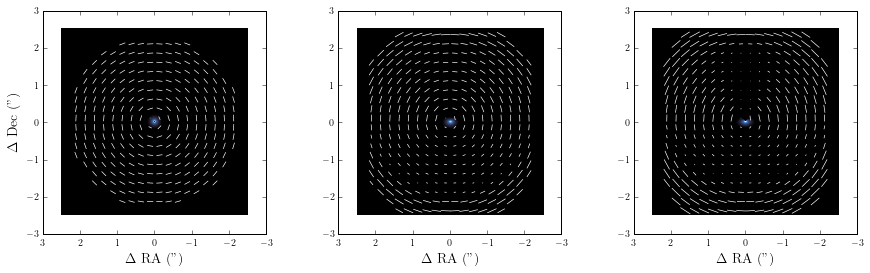

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
cbar = False
no_ylabel = False
for i in range(3):
    if i>0:
        no_ylabel=True
    image_1mum.plot(i, ax=axes[i], type="Qphi", vmax=1e-15, colorbar=cbar,
                    no_ylabel=no_ylabel, pola_vector=True, nbin=15)

In [19]:
mcfost.run(infolder+configfile,options = "-img 1300")
image_1mm  = mcfost.Image("./data_1300/")

pymcfost: Running mcfost ...
 You are running MCFOST 4.0.00
 Git SHA = 6f796ba3cc8976d2e1265e0148f533d5a3895286
 Input file read successfully
 Scattered light + thermal emission map calculation
 Calculating image at wavelength =   1300.000      microns
 Parallelized code on  10 processors
  
Jeu 25 mai 2023 19:14:06 CEST
 Creating directory ././data_1300
 Using ray-tracing method 2
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Number of regions detected: 1
 zone 1 --> region= 1 : R=1.00 to 300.00 AU
 Using        7000 cells
 Total  gas mass in model:  0.1000000      Msun
 Total dust mass in model:  1.0000000E-03  Msun
 Using scattering method 2
 Trying to find appropriate stellar spectra ...
 Star #           1  --> lte5000-4.0.NextGen.fits.gz
 Done
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Stellar_Spectra
 /lte5000-4.0.NextGen.fits.gz
 Integ tau dans plan eq. =    54.06935    
  Column density (g/cm^2)   =    4.493638

/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/utils.py:100: RuntimeWarning: divide by zero encountered in true_divide
  exp_m1 = pixel_area * 2.0 * sc.h * nu ** 4 / (sc.c ** 2 * nuFnu)


Max Tb= 67.39486 K
Max Tb= 90.113144 K
Max Tb= 94.10658 K


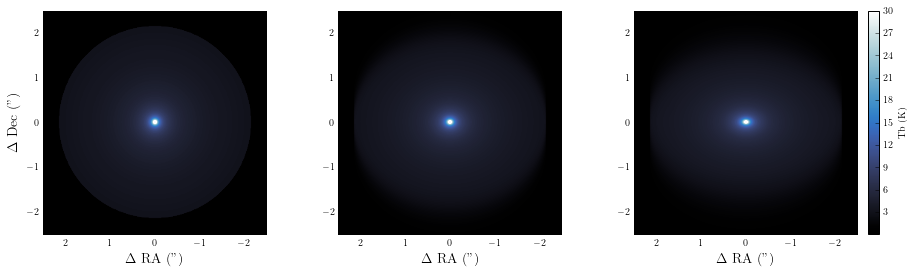

In [20]:
fig.clf()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

cbar = False
no_ylabel = False
for i in range(3):
    if i==2:
        cbar=True
    if i>0:
        no_ylabel=True
    image_1mm.plot(i, ax=axes[i], Tb=True, colorbar=cbar, no_ylabel=no_ylabel, vmax=30)

In [21]:
mcfost.run(infolder+configfile,options = "-no_T -mol")

pymcfost: Running mcfost ...
 You are running MCFOST 4.0.00
 Git SHA = 6f796ba3cc8976d2e1265e0148f533d5a3895286
 it can be turned back on with -rt2
 Input file read successfully
 Thermal equilibrium calculation
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Molecules/co.da
 t
 Molecular line transfer under LTE approximation
 Parallelized code on  10 processors
  
Jeu 25 mai 2023 19:14:35 CEST
 Creating directory ././data_CO
 Using ray-tracing method 1
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Number of regions detected: 1
 zone 1 --> region= 1 : R=1.00 to 300.00 AU
 Using        7000 cells
 Total  gas mass in model:  0.1000000      Msun
 Total dust mass in model:  1.0000000E-03  Msun
 Using scattering method 2
 Reading temperature file : ././data_th/Temperature.fits.gz
 Trying to find appropriate stellar spectra ...
 Star #           1  --> lte5000-4.0.NextGen.fits.gz
 Done
 Reading /Users/desgranc/Documents/work/other_

In [22]:
mol = mcfost.Line("./data_CO/")

[8.61838077e-16 8.62364720e-16 8.63403500e-16 8.66872947e-16
 8.67492340e-16 8.73887545e-16 8.75170482e-16 8.74908960e-16
 8.86526811e-16 8.98173938e-16 9.17757551e-16 9.38370098e-16
 9.84394586e-16 1.07572083e-15 1.23924097e-15 1.62838717e-15
 2.68351790e-15 6.32380992e-15 1.00012594e-14 8.07602124e-15
 7.07456571e-15 8.07602039e-15 1.00012585e-14 6.32380992e-15
 2.68351748e-15 1.62838717e-15 1.23924118e-15 1.07572083e-15
 9.84394586e-16 9.38370098e-16 9.17757551e-16 8.98174044e-16
 8.86526811e-16 8.74908960e-16 8.75170376e-16 8.73887545e-16
 8.67492340e-16 8.66872947e-16 8.63403500e-16 8.62364720e-16
 8.61838077e-16]


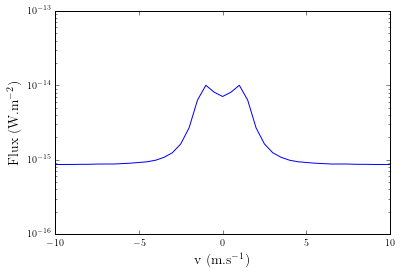

In [23]:
mol.plot_line(2)

Selecting channel # 21
Max Tb= 143.92345 K


/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/utils.py:100: RuntimeWarning: divide by zero encountered in true_divide
  exp_m1 = pixel_area * 2.0 * sc.h * nu ** 4 / (sc.c ** 2 * nuFnu)


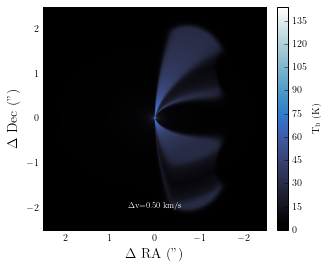

In [24]:
mol.plot_map(2,v=0.5, Tb=True)

Selecting channel # 21
Max Tb= 51.339106561923245 K


/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/utils.py:100: RuntimeWarning: divide by zero encountered in true_divide
  exp_m1 = pixel_area * 2.0 * sc.h * nu ** 4 / (sc.c ** 2 * nuFnu)
/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/utils.py:101: RuntimeWarning: invalid value encountered in log1p
  hnu_kT = np.log1p(exp_m1)


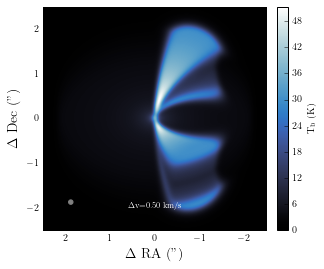

In [25]:
mol.plot_map(2,v=0.5, bmaj=0.1, bmin=0.1, bpa=0, Tb=True)